# Admission Data Visualizations for Ministry of Education

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_excel('cleaned_clustered_admissions(14).xlsx')

# Convert all strings to uppercase for consistency
df['dname'] = df['dname'].str.upper()
df['region'] = df['region'].str.upper()
df['cluster'] = df['cluster'].str.upper()
df['ge'] = df['ge'].str.upper()


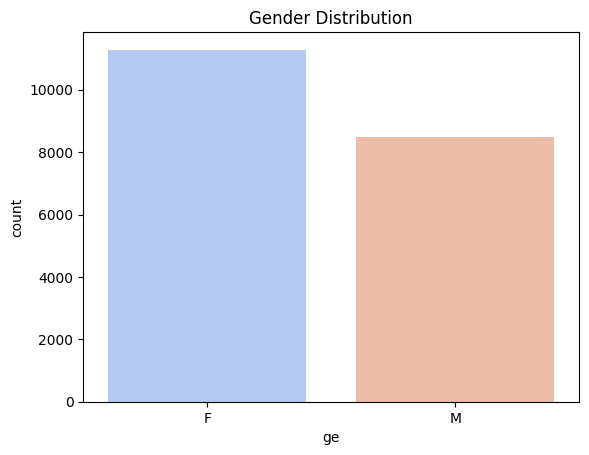

In [18]:
# Visualization 1: ge Distribution
sns.countplot(data=df, x='ge', palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

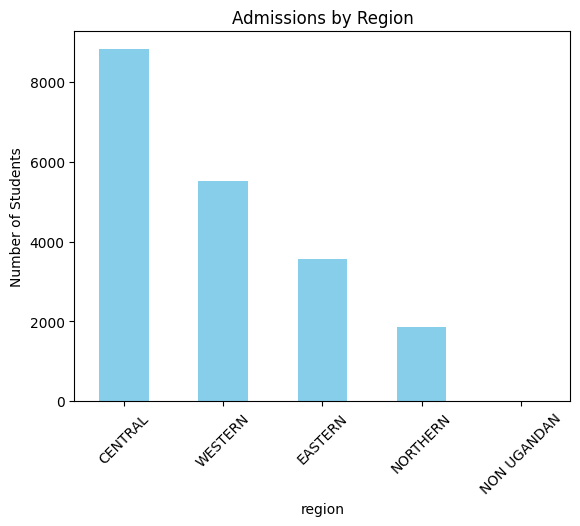

In [19]:
# Visualization 2: Admissions by Region
df['region'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Admissions by Region')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

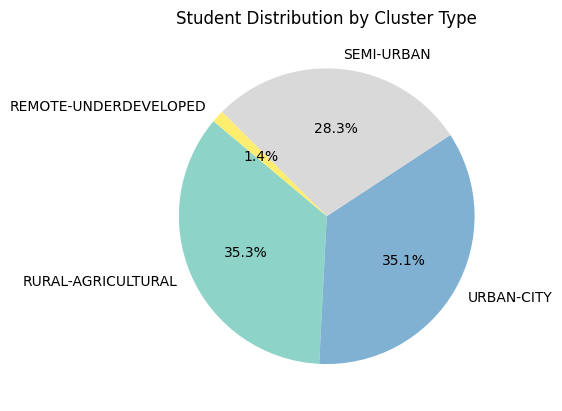

In [20]:
# Visualization 3: Cluster Type Distribution
df['cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Student Distribution by Cluster Type')
plt.ylabel('')
plt.show()

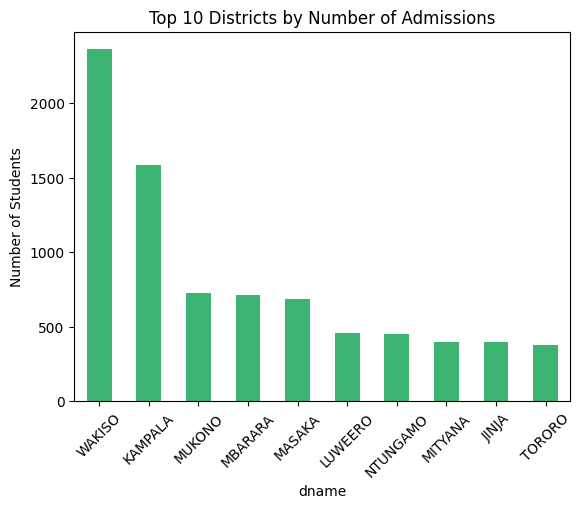

In [21]:
# Visualization 4: Top 10 Districts by Admissions
top_districts = df['dname'].value_counts().head(10)
top_districts.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Districts by Number of Admissions')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

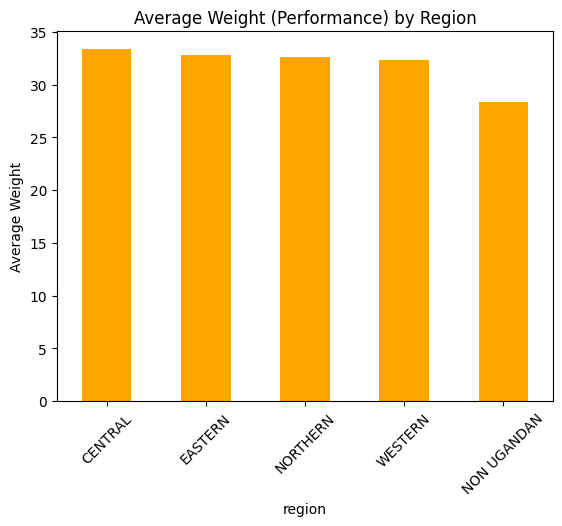

In [22]:
# Visualization 5: Average Weight by Region
avg_weight_region = df.groupby('region')['tot_wt'].mean().sort_values(ascending=False)
avg_weight_region.plot(kind='bar', color='orange')
plt.title('Average Weight (Performance) by Region')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()

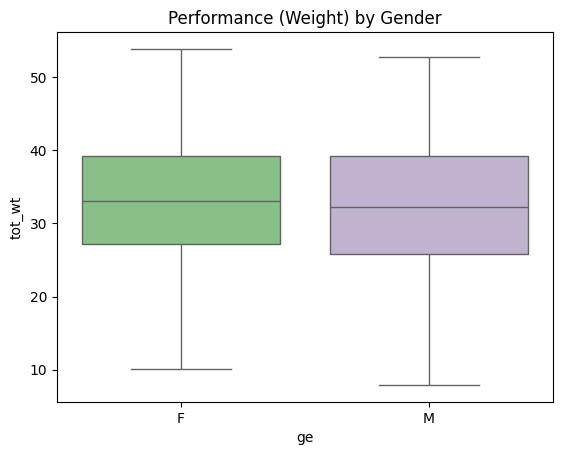

In [23]:
# Visualization 6: Performance by Gender
sns.boxplot(data=df, x='ge', y='tot_wt', palette='Accent')
plt.title('Performance (Weight) by Gender')
plt.show()

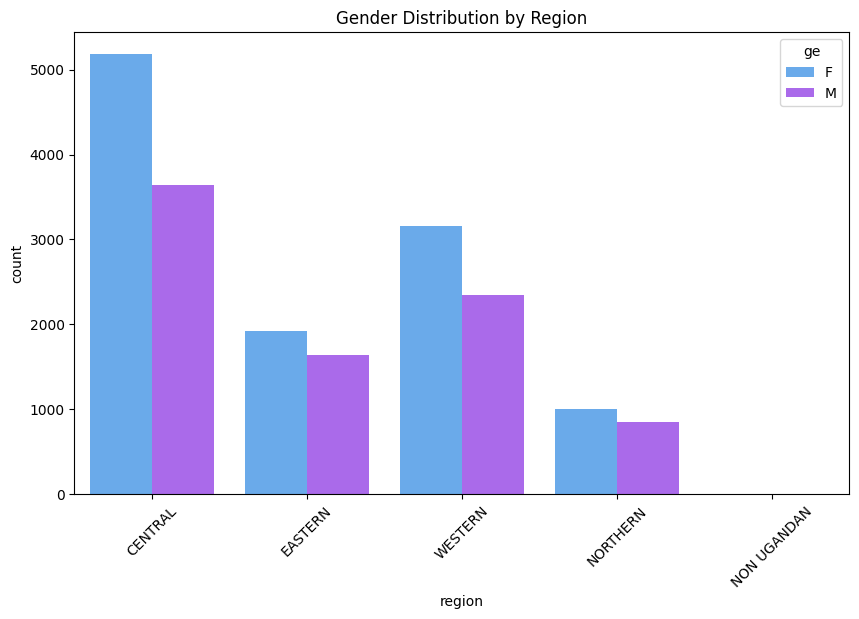

In [24]:
# Visualization 7: Gender Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='ge', palette='cool')
plt.title('Gender Distribution by Region')
plt.xticks(rotation=45)
plt.show()

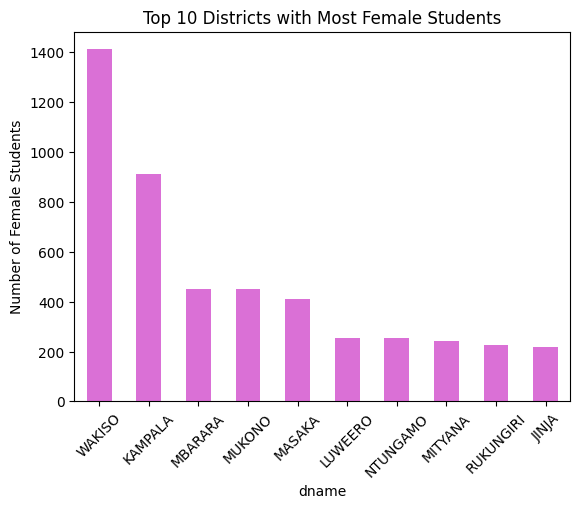

In [25]:
# Visualization 8: Top 10 Districts with Most Female Students
female_df = df[df['ge'] == 'F']
top_female = female_df['dname'].value_counts().head(10)
top_female.plot(kind='bar', color='orchid')
plt.title('Top 10 Districts with Most Female Students')
plt.ylabel('Number of Female Students')
plt.xticks(rotation=45)
plt.show()

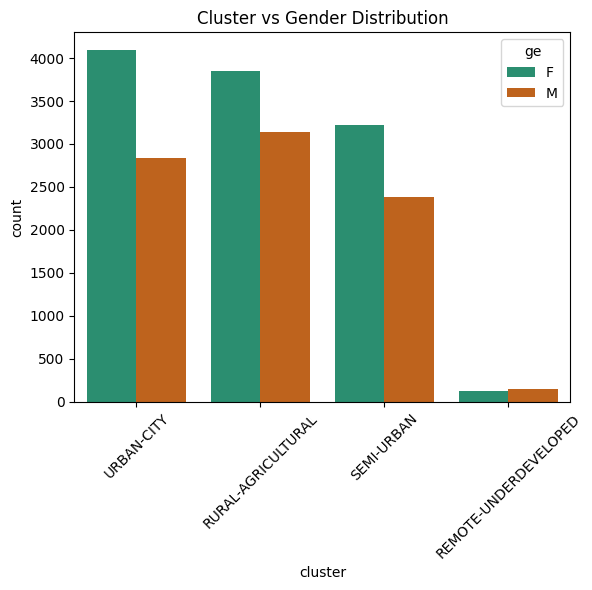

In [26]:
# Visualization 9: Cluster vs Gender
sns.countplot(data=df, x='cluster', hue='ge', palette='Dark2')
plt.title('Cluster vs Gender Distribution')
plt.xticks(rotation=45)
plt.show()

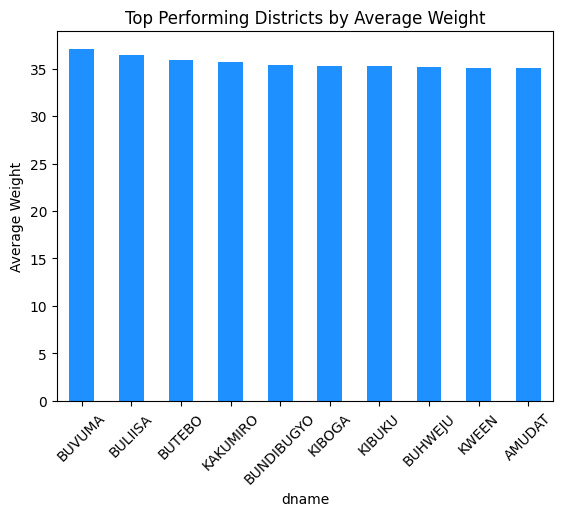

In [27]:
# Visualization 10: Top Performing Districts
top_perf = df.groupby('dname')['tot_wt'].mean().sort_values(ascending=False).head(10)
top_perf.plot(kind='bar', color='dodgerblue')
plt.title('Top Performing Districts by Average Weight')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()